In [99]:
import math
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product

In [105]:
list(product([5], [1, 2], [3, 4]))

[(5, 1, 3), (5, 1, 4), (5, 2, 3), (5, 2, 4)]

In [111]:
# N must be prime, otherwise there exist a, b such that mult(a, b) = 0, not invertible.

N = 17

def decompose(n):
    factors = []
    k = 2
    while k <= math.ceil(math.sqrt(n)):
        if n % k == 0:
            factors.append(k)
            n = n // k
        else:
            k += 1
    factors.append(n)
    return factors

def divisors(n):
    decomp = Counter(decompose(n))
    factors = decomp.keys()
    mults = decomp.values()
    divisor_mults = product(*[range(m) for m in mults])
    divisors = []
    for m_tup in divisor_mults:
        d = 1
        for f, m in zip(factors, m_tup):
            d *= f**m
        divisors.append(d)
    return divisors

def check_prime(n):
    for k in range(2, math.ceil(math.sqrt(n))):
        if n % k == 0:
            return False
    return True

print(check_prime(N))

True


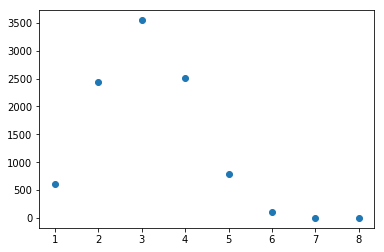

In [151]:
numbers = range(9690000, 9700000)
n_factors = []
for n in numbers:
    n_factors.append(len(set(decompose(n))))

c = Counter(n_factors)
plt.scatter(c.keys(), c.values())
plt.show()

In [62]:
# define operations for Z_N^* multiplicative group

def mult(a, b):
    return (a * b) % N

def power(a, k):
    X = a
    E = k
    Y = 1
    while E > 0:
        if E % 2 == 0:
            X = mult(X, X)
            E = E//2
        else:
            Y = mult(Y, X)
            E = E - 1
    return Y

memo = {}
def order(n):
    k = 1
    m = n
    while m != 1:
        m = mult(m, n)
        k += 1
    return k

In [42]:
orders = [order(k) for k in range(1, N)]
Counter(orders)

Counter({1: 1, 2: 1, 7: 6, 14: 6, 443: 442, 886: 442, 3101: 2652, 6202: 2652})